# Pymaceuticals Inc.
---


This study contains different drug treatments on tumer in mice. It contains effects of different drug regimen. 

Analysis:
1. Duplicate mice record needed to be cleaned up.
2. Male gender percentage was slightly more in mice being treated.
3. Higher the weight of the mice, more are the chances of tumor in mice.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

In [2]:
# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
print(mouse_metadata.shape)
mouse_metadata.head()

(249, 5)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [3]:
study_results = pd.read_csv(study_results_path)
print(study_results.shape)
study_results.head()

(1893, 4)


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [4]:
# Combine the data into a single DataFrame

merge_df = pd.merge(study_results, mouse_metadata, how='left', on="Mouse ID")
#del study_results, mouse_metadata
# Display the data table for preview
print(merge_df.shape)
merge_df.head()


(1893, 8)


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [5]:
# Checking the number of mice.
unique_mouse_count = mouse_metadata['Mouse ID'].nunique()

print("number of mice", unique_mouse_count)

number of mice 249


In [6]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicates = merge_df[merge_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]['Mouse ID'].unique()

duplicates

array(['g989'], dtype=object)

In [7]:
# Optional: Get all the data for the duplicate mouse ID. 
filtered_df = merge_df[merge_df['Mouse ID'].isin(duplicates)]


filtered_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
filtered_df_unique = merge_df[~merge_df['Mouse ID'].isin(duplicates)]


filtered_df_unique.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [9]:
# Checking the number of mice in the clean DataFrame.
unique_clean_mouse_count = filtered_df_unique['Mouse ID'].nunique()

unique_clean_mouse_count

248

## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

summary_tumor_vol_mean = merge_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
summary_tumor_vol_median = merge_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
summary_tumor_vol_var = merge_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
summary_tumor_vol_std = merge_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
summary_tumor_vol_sem = merge_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()


summary_df_display = pd.DataFrame({
    'Mean Tumor Volume': summary_tumor_vol_mean,
    'Median Tumor Volume': summary_tumor_vol_median,
    'Tumor Volume Variance': summary_tumor_vol_var,
    'Tumor Volume Std. Dev.': summary_tumor_vol_std,
    'Tumor Volume Std. Err.': summary_tumor_vol_sem
 
})

summary_df_display

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [11]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

summary_df = merge_df.groupby('Drug Regimen').aggregate({
    'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']
})
summary_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<Axes: xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints'>

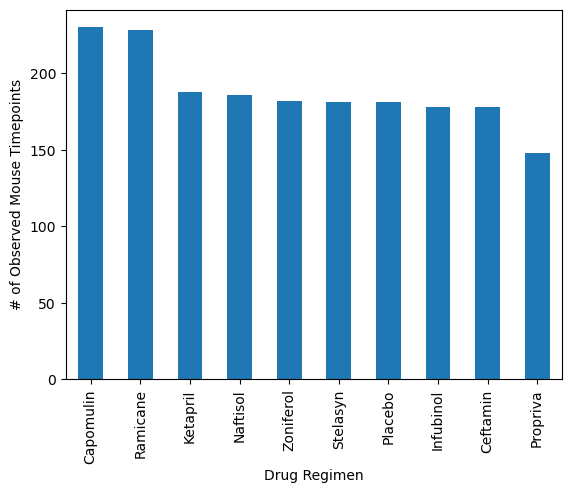

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regimen_counts = filtered_df_unique['Drug Regimen'].value_counts()

regimen_counts.plot(kind='bar', ylabel='# of Observed Mouse Timepoints', xlabel='Drug Regimen')


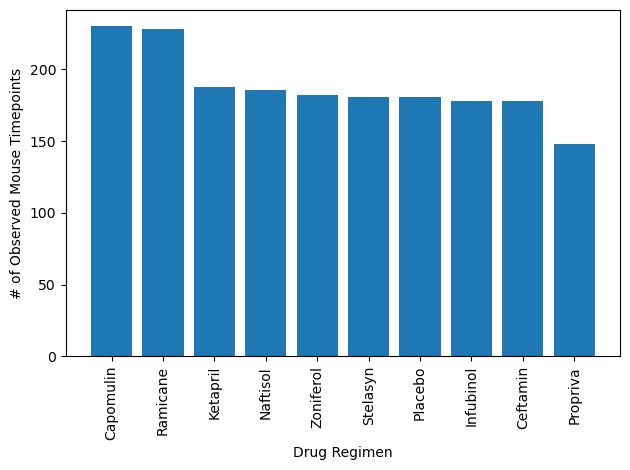

In [13]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
regimen_names = regimen_counts.index
regimen_values = regimen_counts.values
plt.bar(regimen_names, regimen_values)
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

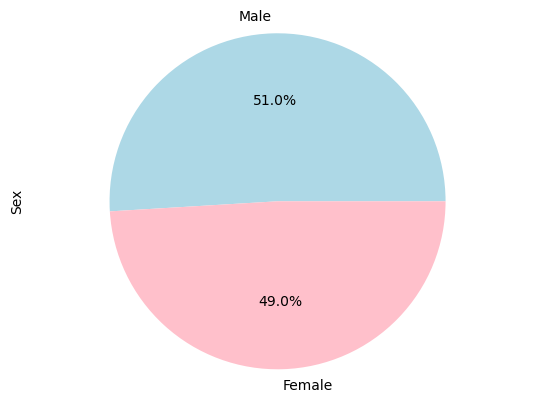

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_counts = filtered_df_unique['Sex'].value_counts()
gender_counts
gender_counts.plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'pink'])
plt.ylabel('Sex')
plt.axis('equal')
plt.show()

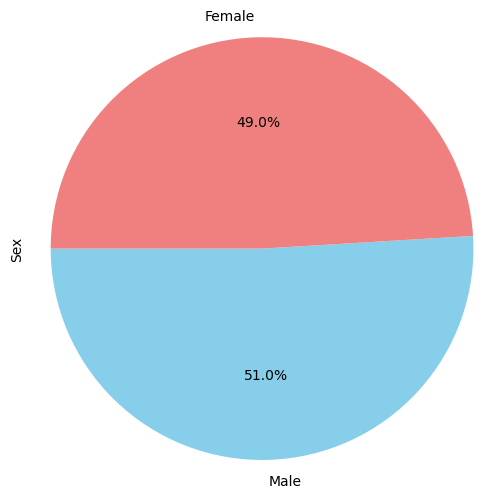

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_counts_n = filtered_df_unique['Sex'].value_counts()
labels = gender_counts_n.index
sizes = gender_counts_n.values
colors = ['skyblue', 'lightcoral']
explode = (0, 0.1)
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=180)
plt.ylabel('Sex')
plt.axis('equal')
plt.show()

## Quartiles, Outliers and Boxplots

In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoints = filtered_df_unique.groupby('Mouse ID')['Timepoint'].max()
last_timepoints

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_timepoint_df = filtered_df_unique[filtered_df_unique.set_index(['Mouse ID', 'Timepoint']).index.isin(last_timepoints.reset_index().set_index(['Mouse ID', 'Timepoint']).index)]
last_timepoint_df

target_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
final_tumor_volume = last_timepoint_df[last_timepoint_df['Drug Regimen'].isin(target_regimens)]
final_tumor_volume

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
182,u153,0,45.000000,0,Ceftamin,Female,11,25
194,b447,0,45.000000,0,Ceftamin,Male,2,30
217,x226,0,45.000000,0,Ceftamin,Male,23,28
222,t573,0,45.000000,0,Ceftamin,Female,15,27
420,c326,5,36.321346,0,Infubinol,Female,18,25
...,...,...,...,...,...,...,...,...
1879,a644,45,32.978522,1,Ramicane,Female,7,17
1885,i177,45,33.562402,3,Ramicane,Male,10,18
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17


In [17]:
# Put treatments into a list for for loop (and later for plot labels)
target_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
plotting_vol_data=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers.    
 # Locate the rows which contain mice on each drug and get the tumor volumes
 # add subset 

    
    # Determine outliers using upper and lower bounds    
for treatment in target_regimens:
    treatment_df = final_tumor_volume[final_tumor_volume['Drug Regimen'] == treatment]
    
    # print the patient IDs for the current treatment
    #print(f'{treatment} potential outliers: {list(treatment_df["Tumor Volume (mm3)"])}')
    tumor_volume = treatment_df['Tumor Volume (mm3)']
    plotting_vol_data.append(tumor_volume)
    
    # Calculate the quartiles and IQR for the current treatment
    quartiles = tumor_volume.quantile([0.25, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    
    # Calculate the lower and upper bounds for potential outliers
    lower_bound = lower_quartile - 1.5 * iqr
    upper_bound = upper_quartile + 1.5 * iqr
    
    # Identify potential outliers for the current treatment
    outliers = treatment_df[(treatment_df['Tumor Volume (mm3)'] < lower_bound) | (treatment_df['Tumor Volume (mm3)'] > upper_bound)]
    
    # Print the results for the current treatment
    print(f'Treatment {treatment}:')
    print(f"IQR: {iqr}")
    print(f"Lower Bound: {lower_bound}")
    print(f"Upper Bound: {upper_bound}")
    print(f"Potential Outliers: {outliers['Tumor Volume (mm3)'].tolist()}\n")    



Treatment Capomulin:
IQR: 7.781863460000004
Lower Bound: 20.70456164999999
Upper Bound: 51.83201549
Potential Outliers: []

Treatment Ramicane:
IQR: 9.098536719999998
Lower Bound: 17.912664470000003
Upper Bound: 54.30681135
Potential Outliers: []

Treatment Infubinol:
IQR: 11.477135160000003
Lower Bound: 36.83290494999999
Upper Bound: 82.74144559000001
Potential Outliers: [36.3213458]

Treatment Ceftamin:
IQR: 15.577752179999997
Lower Bound: 25.355449580000002
Upper Bound: 87.66645829999999
Potential Outliers: []



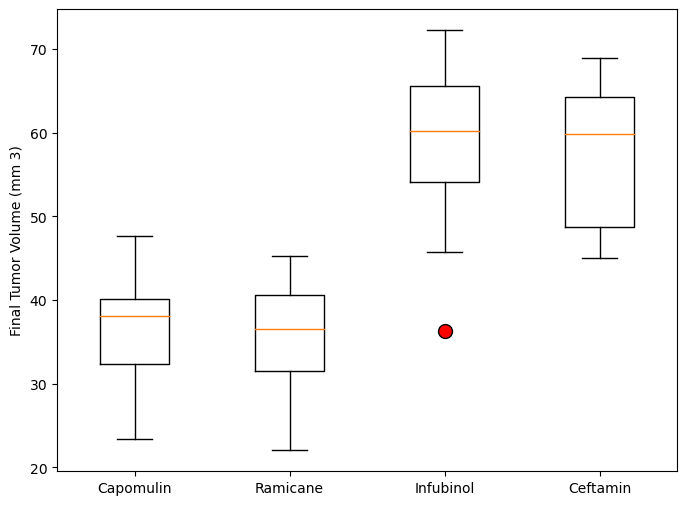

In [18]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
treatment_data = {}
for treatment in target_regimens:
    treatment_data[treatment] = final_tumor_volume[final_tumor_volume['Drug Regimen'] == treatment]['Tumor Volume (mm3)']
# Create a list of tumor volume data for box plotting
data_to_plot = [treatment_data[treatment] for treatment in target_regimens]

# Create a box plot
plt.figure(figsize=(8, 6))  # Set the figure size (optional)
plt.boxplot(data_to_plot, labels=target_regimens, flierprops=dict(marker='o', markersize= 10, markerfacecolor='red', markeredgecolor='black'))

# Add labels and title

plt.ylabel('Final Tumor Volume (mm 3)')

# Show the plot
plt.show()    

## Line and Scatter Plots

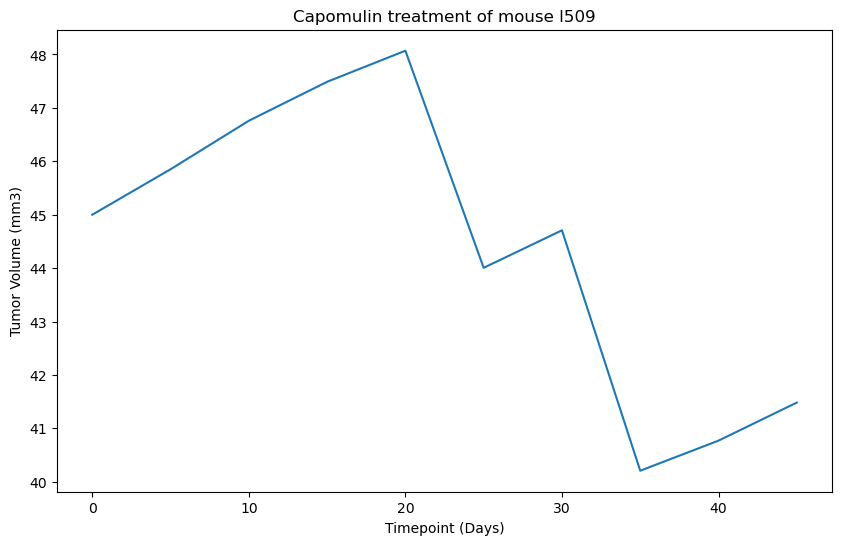

In [31]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Choosing a single mouse treated with Capomulin
Mouse_ID = 'l509'
mouse_data = filtered_df_unique[filtered_df_unique['Mouse ID'] == Mouse_ID]

# Create a line plot for tumor volume vs. time point
plt.figure(figsize=(10, 6))
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'], linestyle='-')

# Add labels and title
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
#plt.title(f'Tumor Volume vs. Time Point for Mouse {mouse_id} (Capomulin Treatment)')
plt.title('Capomulin treatment of mouse l509')

# Show the plot
plt.show()

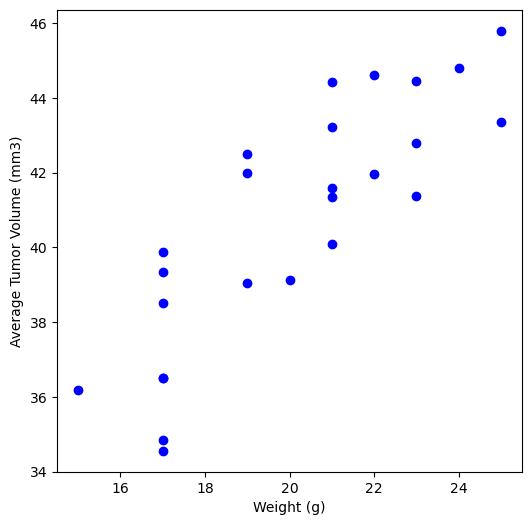

In [75]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Filter the DataFrame for the Capomulin regimen
capomulin_df = filtered_df_unique[filtered_df_unique['Drug Regimen'] == 'Capomulin']
#capomulin_weight_df = capomulin_df.drop_duplicates(subset=['Mouse ID', 'Weight (g)'])

# Calculate the average observed tumor volume for each mouse
average_tumor_volume = capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
average_weight_volume = capomulin_df.groupby('Mouse ID')['Weight (g)'].mean()

# Create a scatter plot of mouse weight vs. average tumor volume
plt.figure(figsize=(6, 6))
plt.scatter(average_weight_volume, average_tumor_volume, marker='o', color='blue')


# Add labels and title
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Show the plot
plt.show()


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is: 0.84


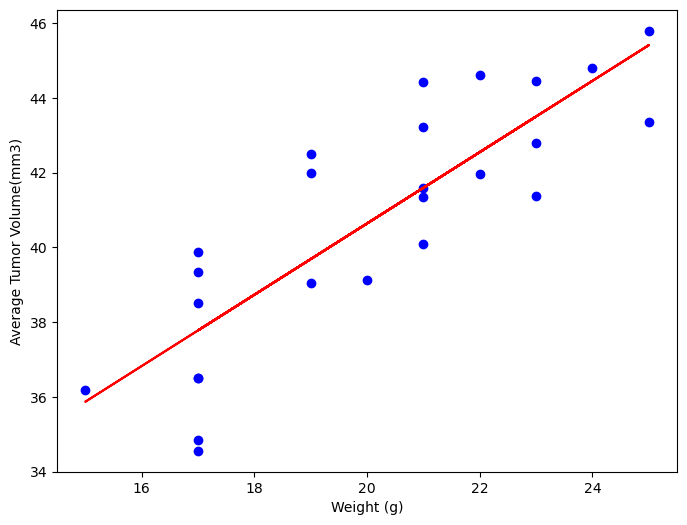

Linear Regression Slope: 0.9544396890241049
Linear Regression Intercept: 21.552160532685008
R-squared: 0.7088568047708723


In [80]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
import numpy as np
from scipy.stats import linregress
capomulin_df = filtered_df_unique[filtered_df_unique['Drug Regimen'] == 'Capomulin']

# Calculate the correlation coefficient between mouse weight and tumor volume
correlation_coefficient = np.corrcoef(average_weight_volume, average_tumor_volume )[0, 1]
#print(correlation_coefficient)
# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(average_weight_volume, average_tumor_volume )

# Create a scatter plot with the linear regression line
plt.figure(figsize=(8, 6))

plt.scatter(average_weight_volume, average_tumor_volume , marker='o', color='blue', label='Data Points')
plt.plot(average_weight_volume, slope * average_weight_volume + intercept, color='red', label='Linear Regression')

# Add labels, title, and legend
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume(mm3)')

print(f"The correlation between mouse weight and the average tumor volume is: {round(correlation_coefficient,2)}")

# Display the plot
plt.show()

# Print the correlation coefficient and regression parameters

print(f'Linear Regression Slope: {slope}')
print(f'Linear Regression Intercept: {intercept}')
print(f'R-squared: {r_value**2}')